# CPS305 Fall 2019
## Lab $06$ Report
## Kushal Dalal, Std ID 500828585

27 October 2019

# Lab 06

This is the submission of Kushal Dalal's lab 

**Briefly describing the experimental setpup**

I created a method called mo3_quicksort which chooses the pivot of median of 3. The setup that i chose is that I created a helper method called "helper_mo3_quickSort" which finds the median of the first, the middle, and the last element. After finding the median, i swap that median element with the element at index 0 of the list. After that, I used the same quicksort solution used in the textbook.



## Solution for the Exercise

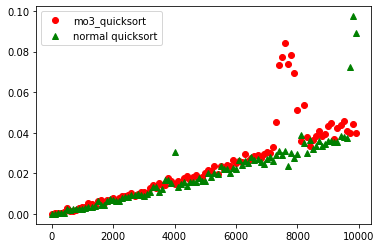

In [14]:
import random
import timeit
import matplotlib.pyplot as plt 

mo3_List = []
normal_List = []
commonList1 = []
commonList2 = []


def m03_quickSort(alist):
    mo3_quickSortHelper(alist,0,len(alist)-1)

def mo3_quickSortHelper(alist,first,last):
    
    if first<last:
        splitpoint = m03_partition(alist,first,last)
        mo3_quickSortHelper(alist,first,splitpoint-1)
        mo3_quickSortHelper(alist,splitpoint+1,last)

def helper_mo3_quickSort(listA,first,last):
    ret=0
    if(((listA[last]-listA[first])*(listA[(last-first)//2]-listA[last])) >= 0):
        ret=last
    elif(((listA[first]-listA[last])*(listA[(last-first)//2]-listA[first])) >= 0):
        ret=first
    else:
        ret=(last-first)//2
    return ret
    
def m03_partition(alist,first,last):
        
    #pivotvalue = alist[first]
    pivotvalue = helper_mo3_quickSort(alist,first,last)
    alist[first],alist[pivotvalue] = alist[pivotvalue], alist[first]
    
    leftmark = first+1
    rightmark = last
 
    done = False
    while not done:
        while leftmark <= rightmark and alist[leftmark] <= alist[first]:
            leftmark = leftmark + 1
        
        while alist[rightmark] >= alist[first] and rightmark >= leftmark:
            rightmark = rightmark -1
        
        if rightmark < leftmark:
            done = True
        else:
            temp = alist[leftmark]
            alist[leftmark] = alist[rightmark]
            alist[rightmark] = temp
    
    temp = alist[first]
    alist[first] = alist[rightmark]
    alist[rightmark] = temp


    return rightmark


for i in range(0,10000, 100):
    
    getTime = timeit.Timer("m03_quickSort(alist)", 
                           "from __main__ import random, m03_quickSort, alist")
    
    alist = random.sample(range(1, 11000), i)
    result = getTime.timeit(number=1)
    commonList1.append(i)        
    mo3_List.append(result)    

#---------------------------------------------Normal QuickSort ---------------------------------------------
def quickSort(alist):
    quickSortHelper(alist,0,len(alist)-1)

def quickSortHelper(alist,first,last):
    
    if first<last:
        splitpoint = normal_partition(alist,first,last)
        quickSortHelper(alist,first,splitpoint-1)
        quickSortHelper(alist,splitpoint+1,last)

def normal_partition(alist,first,last):
            
    leftmark = first+1
    rightmark = last
 
    done = False
    while not done:
        while leftmark <= rightmark and alist[leftmark] <= alist[first]:
            leftmark = leftmark + 1
        
        while alist[rightmark] >= alist[first] and rightmark >= leftmark:
            rightmark = rightmark -1
        
        if rightmark < leftmark:
            done = True
        else:
            temp = alist[leftmark]
            alist[leftmark] = alist[rightmark]
            alist[rightmark] = temp
    
    temp = alist[first]
    alist[first] = alist[rightmark]
    alist[rightmark] = temp

    return rightmark
    

for i in range(0,10000,100):
    
    getTime = timeit.Timer("quickSort(alist2)", 
                           "from __main__ import random, quickSort, alist2")
    
    alist2 = random.sample(range(1, 11000), i)
    result2 = getTime.timeit(number=1)
    commonList2.append(i)        
    normal_List.append(result2)


mo3QuickSortItem = plt.plot(commonList1,mo3_List, "ro", label='mo3_quicksort')
normalQuickSortItem = plt.plot(commonList2,normal_List, "g^", label='normal quicksort')
plt.legend()
plt.show()


**Discussion of the Results**

The following graph shows that choosing the median as a pivot is same efficient and faster in time as choosing the first element always as a pivot in the unsorted list. 